# This notebook demonstrates an example of exploratory analysis for a Financial Consumer Dataset

### Only partial data is available in the data.csv file. So the analysis can be followed, but the results of the notebook may be slightly different given the number of rows

## Step 1: Reading the data and examining the number of rows and columns

In [30]:
import pandas as pd
df=pd.read_csv("data.csv")
df.shape

(6394, 217)

In [31]:
df.columns


Index(['PUF_ID', 'sample', 'fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore',
       'FWB1_1', 'FWB1_2', 'FWB1_3',
       ...
       'PPMSACAT', 'PPREG4', 'PPREG9', 'PPT01', 'PPT25', 'PPT612', 'PPT1317',
       'PPT18OV', 'PCTLT200FPL', 'finalwt'],
      dtype='object', length=217)

### Looks like there are many columns to begin with. Let us examine them few at a time

In [32]:
columns=df.columns
#start examining the columns
intcolumns=columns[81:121]
intcolumns

Index(['VALUERANGES', 'MORTGAGE', 'SAVINGSRANGES', 'PRODHAVE_1', 'PRODHAVE_2',
       'PRODHAVE_3', 'PRODHAVE_4', 'PRODHAVE_5', 'PRODHAVE_6', 'PRODHAVE_7',
       'PRODHAVE_8', 'PRODHAVE_9', 'PRODUSE_1', 'PRODUSE_2', 'PRODUSE_3',
       'PRODUSE_4', 'PRODUSE_5', 'PRODUSE_6', 'CONSPROTECT1', 'CONSPROTECT2',
       'CONSPROTECT3', 'EARNERS', 'VOLATILITY', 'SNAP', 'MATHARDSHIP_1',
       'MATHARDSHIP_2', 'MATHARDSHIP_3', 'MATHARDSHIP_4', 'MATHARDSHIP_5',
       'MATHARDSHIP_6', 'COLLECT', 'REJECTED_1', 'REJECTED_2', 'ABSORBSHOCK',
       'BENEFITS_1', 'BENEFITS_2', 'BENEFITS_3', 'BENEFITS_4', 'BENEFITS_5',
       'FRAUD2'],
      dtype='object')

In [33]:
len(columns)

217

### Observation: There are 217 columns

### After examining all the columns, we have picked the index numbers of columns we are interested in

In [34]:
#interested column list
listcols=[2,3,4,5,6,17,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,50,58,77,78,
         84,85,86,87,88,89,90,102,103,115,116,117,118,119,120,139,155,174,180,181,186,
          199,200,201,202,203,204,205,206]

In [35]:
#Checking if all the columns of interest have been included
columns[listcols]

Index(['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore', 'FSscore', 'SUBKNOWL1',
       'ACT1_1', 'ACT1_2', 'FINGOALS', 'PROPPLAN_1', 'PROPPLAN_2',
       'PROPPLAN_3', 'PROPPLAN_4', 'MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3',
       'MANAGE1_4', 'SAVEHABIT', 'FRUGALITY', 'AUTOMATED_1', 'AUTOMATED_2',
       'ASK1_1', 'LMscore', 'KHKNOWL1', 'HOUSING', 'LIVINGARRANGEMENT',
       'PRODHAVE_1', 'PRODHAVE_2', 'PRODHAVE_3', 'PRODHAVE_4', 'PRODHAVE_5',
       'PRODHAVE_6', 'PRODHAVE_7', 'EARNERS', 'VOLATILITY', 'BENEFITS_1',
       'BENEFITS_2', 'BENEFITS_3', 'BENEFITS_4', 'BENEFITS_5', 'FRAUD2',
       'PAREDUC', 'SCFHORIZON', 'PEM', 'HHEDUC', 'KIDS_NoChildren', 'EMPLOY',
       'agecat', 'generation', 'PPEDUC', 'PPETHM', 'PPGENDER', 'PPHHSIZE',
       'PPINCIMP', 'PPMARIT'],
      dtype='object')

### Creating a new dataframe with columns we are interested in

In [36]:
resultdf=df.iloc[:,listcols].copy()
resultdf.columns

Index(['fpl', 'SWB_1', 'SWB_2', 'SWB_3', 'FWBscore', 'FSscore', 'SUBKNOWL1',
       'ACT1_1', 'ACT1_2', 'FINGOALS', 'PROPPLAN_1', 'PROPPLAN_2',
       'PROPPLAN_3', 'PROPPLAN_4', 'MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3',
       'MANAGE1_4', 'SAVEHABIT', 'FRUGALITY', 'AUTOMATED_1', 'AUTOMATED_2',
       'ASK1_1', 'LMscore', 'KHKNOWL1', 'HOUSING', 'LIVINGARRANGEMENT',
       'PRODHAVE_1', 'PRODHAVE_2', 'PRODHAVE_3', 'PRODHAVE_4', 'PRODHAVE_5',
       'PRODHAVE_6', 'PRODHAVE_7', 'EARNERS', 'VOLATILITY', 'BENEFITS_1',
       'BENEFITS_2', 'BENEFITS_3', 'BENEFITS_4', 'BENEFITS_5', 'FRAUD2',
       'PAREDUC', 'SCFHORIZON', 'PEM', 'HHEDUC', 'KIDS_NoChildren', 'EMPLOY',
       'agecat', 'generation', 'PPEDUC', 'PPETHM', 'PPGENDER', 'PPHHSIZE',
       'PPINCIMP', 'PPMARIT'],
      dtype='object')

## Step 2: Dimensionality Reduction
### Dimensionality reduction is important given we have lots of columns. We can try principal component analysis for reducing the planning as well as managing dimensions of the customer, to create a demographic profile

In [37]:
#selecting specific columns for PCA
df_pca=newdf.loc[:,['PROPPLAN_1', 'PROPPLAN_2','PROPPLAN_3', 'PROPPLAN_4', 
                'MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3','MANAGE1_4', 
                'SAVEHABIT', 'FRUGALITY',]].copy()
df_pca_prop=newdf.loc[:,['PROPPLAN_1', 'PROPPLAN_2','PROPPLAN_3', 'PROPPLAN_4', 
                ]].copy()

### Examining some plots before we do the PCA

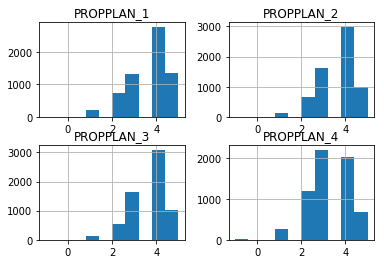

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
df_pca_prop.hist()
plt.show()


### We may choose to do standardization if the variables are measured on different scales. In this case, it is not needed
### Running the PCA model

In [39]:
from sklearn.decomposition import PCA
pca_sk = PCA()
pca_sk.fit(df_pca_prop)
X_transformed_sk =  pca_sk.fit_transform(df_pca_prop)


### Question: How much of the variance is explained by the components generated?

In [40]:
pca_sk.explained_variance_ratio_

array([0.69788742, 0.14357068, 0.08262837, 0.07591353])

### Conclusion: Two components explain close to 83% of the variance and should be enough for us

### Picking only two top components after PCA and adding it to our dataframe

In [41]:
Xdf=pd.DataFrame(X_transformed_sk[:,0:2])
resultdf = pd.concat([newdf, Xdf], axis=1)

In [42]:
resultdf.head()

,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FSscore,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,...,agecat,generation,PPEDUC,PPETHM,PPGENDER,PPHHSIZE,PPINCIMP,PPMARIT,0,1
0,3,5,5,6,55,44,5,4,3,1,...,8,1,4,1,1,1,7,3,-0.875274,-1.065936
1,3,6,6,6,51,43,5,4,3,0,...,3,3,2,1,1,2,6,3,3.118507,-1.095628
2,3,4,3,4,49,42,5,3,3,1,...,3,3,3,2,1,3,6,3,-0.899928,0.204181
3,3,6,6,6,49,42,-1,-1,-1,-1,...,3,3,2,1,1,1,8,3,1.096962,0.189335
4,3,4,4,4,49,42,4,3,3,1,...,2,4,2,3,1,5,7,1,1.096962,0.189335


### Renaming the columns for better readability

In [43]:
resultdf=resultdf.rename(columns={0:"plan1",1:"plan2"})

###  Repeating the steps for four more columns related to managing finances

In [44]:
#selecting specific columns for PCA
df_pca_man=newdf.loc[:,['MANAGE1_1', 'MANAGE1_2', 'MANAGE1_3','MANAGE1_4']].copy()

In [45]:
#doing the dimensionality reduction for manage
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_pca_man)
X_tr_sk =  pca.fit_transform(df_pca_man)

In [46]:
pca.explained_variance_ratio_

array([0.60611027, 0.19766873, 0.11319199, 0.08302902])

In [47]:
Xdf=pd.DataFrame(X_tr_sk[:,0:2])
resultdf = pd.concat([resultdf, Xdf], axis=1)

In [48]:
resultdf=resultdf.rename(columns={0:"manage1",1:"manage2"})

### Dropping the 8 columns we  performed PCA on and retaining only the 4 components

In [49]:
resultdf=resultdf.drop(columns=['PROPPLAN_1','PROPPLAN_2','PROPPLAN_3','PROPPLAN_4',
                       'MANAGE1_1','MANAGE1_2','MANAGE1_3','MANAGE1_4'])

### Examining the distribution of the predicted class

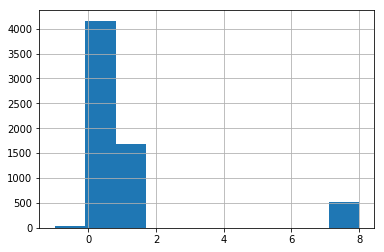

In [144]:
df['FRAUD2'].hist()
plt.show()

### Observation: Invalid values such as -1 and 8 denote missing values in the dataset. We shall remove them from the set

In [50]:
#using only valid values
resultdf=resultdf[resultdf['FRAUD2']!=-1]
resultdf=resultdf[resultdf['FRAUD2']!=8]

### Re-checking if the values are all valid

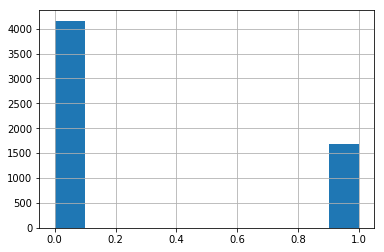

In [53]:
resultdf['FRAUD2'].hist()
plt.show()

### Using a heatmap to observe correlations

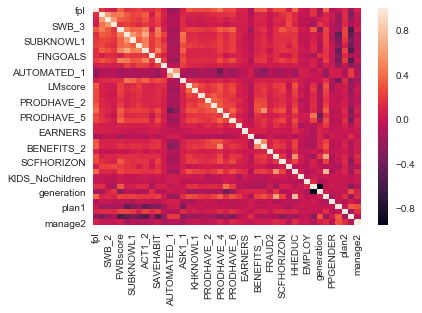

In [185]:
import seaborn as sns; sns.set()
ax = sns.heatmap(resultdf.corr())
plt.show()

### Observation: Not very useful if many columns are present. Instead, one can take a look at the correlation table to isolate strongly correlated columns

In [54]:
resultdf=resultdf.drop(columns=['SWB_1','SWB_2','SWB_3'])

### Examining one of the variables depicting tendency to save

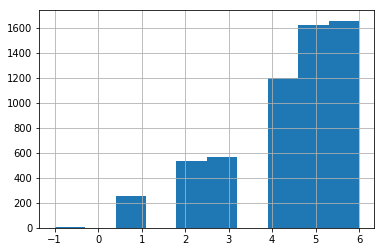

In [56]:
resultdf.SAVEHABIT.hist()
plt.show()

### Observation: Most people tend to have higher ratings on SAVEHABIT. This means that they have higher tendency to save

### Replacing all the missing values in the dataset to NA and then dropping them

In [57]:
import numpy as np
resultdf=resultdf.replace('-1',np.nan).dropna(axis = 0, how = 'any')

In [58]:
resultdf.shape

(5847, 49)

In [278]:
resultdf.head()

,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FSscore,SUBKNOWL1,ACT1_1,ACT1_2,FINGOALS,...,KIDS_NoChildren,EMPLOY,agecat,generation,PPEDUC,PPGENDER,plan1,plan2,manage1,manage2
0,3,5,5,6,55,44,5,4,3,1,...,-1,8,8,1,4,1,-0.875274,-1.065936,1.363161,-0.751048
1,3,6,6,6,51,43,5,4,3,0,...,1,2,3,3,2,1,3.118507,-1.095628,2.138853,-1.361291
2,3,4,3,4,49,42,5,3,3,1,...,0,2,3,3,3,1,-0.899928,0.204181,1.676866,1.160168
3,3,6,6,6,49,42,-1,-1,-1,-1,...,-1,99,3,3,2,1,1.096962,0.189335,1.363161,-0.751048
4,3,4,4,4,49,42,4,3,3,1,...,1,2,2,4,2,1,1.096962,0.189335,1.676866,1.160168


### We may decide to save the cleaned file for future use

In [59]:
resultdf.to_csv("cleandata.csv")

## Step 3: Creating the training and test dataset

### In this example, we are using only few predictor variables to run the model. This is an iterative process. Which columns to include depends on domain knowledge as well.

In [60]:
#splitting dataset for training and test
mdf=resultdf.copy()
mdf=mdf.dropna()
from sklearn.model_selection import train_test_split

train, test = train_test_split(mdf, test_size=0.2)
train=train.dropna()
test=test.dropna()
predictors=['FSscore','SAVEHABIT',"ACT1_1",'ACT1_2','plan1','plan2','manage1','manage2']
label=['FRAUD2']
X_train =train[predictors]
y_train =train[label]
X_test = test[predictors]
y_test = test[label]
#xgboost needs ravel
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

## Step 4: Running multiple models to see which performs best

In [61]:
#importing all the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

#import accuracy measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))
#models.append(("CatBoost",CatBoostClassifier()))



# evaluate each model in turn

names = []
accuracy=[]
rocscore=[]
for name, model in models:
    modelfit=model.fit(X_train,y_train)
    predval=modelfit.predict(X_test)
    accu_score=accuracy_score(predval, y_test)
    predprob=model.predict_proba(X_test)
    roscore=roc_auc_score(y_test, predprob[:,1])
    names.append(name)
    accuracy.append(accu_score)
    rocscore.append(roscore)
    msg = "%s: %f %f" % (name, accu_score,roscore)
    print(msg)


Logistic Regression: 0.718803 0.590349
Decision Tree: 0.597436 0.511395
Random Forest: 0.665812 0.536678
GBM: 0.711111 0.573519
XGB: 0.711111 0.586075


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Conclusion: Logistic Regression seems to be performing better with a better accuracy rate across classes as well as a good ROC score of 59%